I will be performing exploratory data analysis(EDA) on a diamond sales dataset.  
The dataset I will be using can be found at https://www.kaggle.com/datasets/sahilnbajaj/diamonds-sale-data

In [265]:
# Importing libaries and reading csv file as a pandas dataframe
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

diamonds = pd.read_csv('diamonds.csv')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [266]:
# Exploring data shape
diamonds.shape

(53940, 10)

In [267]:
# Exporing data
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [268]:
# Checking for missing values
diamonds.isnull().sum()
#No missing values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Understanding the column names**

Carat:
Carat is the unit of measurement for the physical weight of diamonds. One carat equals 0.200 grams or 1/5 gram and is subdivided into 100 points.

Cut:
The cut describes the diamond’s proportions and technical details, influencing its brilliance. A superior cut offers enhanced fire and sparkle. Diamond cuts are graded from ‘Ideal’ at the top to ‘Poor’ at the bottom.

Color: 
Diamond colour is all about what you can’t see. Diamonds are valued by how closely they approach colorlessness – the less color, the higher their value. The scale begins with the letter D, representing colourless, and continues with increasing presence of colour to the letter Z.

Clarity: 
Diamond Clarity Refers to the Absence of Inclusions and Blemishes. 
Flawless (FL) No inclusions and no blemishes visible under 10x magnification
Internally Flawless (IF) No inclusions visible under 10x magnification
Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor
Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification
Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance
 
Depth: 
Diamond depth refers to its height (in mm) measured from the bottom tip called the culet to the flat top surface called the table.

Table: 
The table of a diamond is the top facet of the diamond in the center of the crown.

Price: 
Price refers to the cost of the diamond. This will be influenced by various factors including carat weight, cut, color, and clarity.

X, Y, Z: 
These dimensions represent the length, width, and depth of the diamond, respectively. They are typically measured in millimeters.

In [269]:
#Understanding the dataset
min_diamond = diamonds.price.min()
max_diamond = diamonds.price.max()
print('The most expensive diamond sale was ' + str(max_diamond) + ' dollars.')
print('The cheapest diamond sale was ' + str(min_diamond) + ' dollars.')

carat_min = diamonds.carat.min()
carat_max = diamonds.carat.max()
print('The smallest carat diamond sold was ' + str(carat_min) + ' carats.')
print('The biggest carat diamond sold was ' + str(carat_max) +  ' carats.')

unique_cut = diamonds.cut.unique()
print('The quality of the cut of diamonds are measured by: ' + str(unique_cut))

unique_colour = diamonds.color.unique()
unique_colour_sorted = sorted(unique_colour)
print('The colour of the diamonds are ranked by ' +str(unique_colour_sorted) + ', \'D\' being the best colour and \'J\' being the worst.')

unique_clarity = diamonds.clarity.unique()

def custom_sort(clarity):
    clarity_order = {"IF": 7, "VVS1": 6, "VVS2": 5, "VS1": 4, "VS2": 3, "SI1": 2, "SI2": 1}  
    return clarity_order.get(clarity, 0)  

unique_clarity_sorted = sorted(unique_clarity, key=custom_sort, reverse=True)

print("The clarity values from highest to lowest quality:", unique_clarity_sorted)

depth_min = diamonds.depth.min()
depth_max = diamonds.depth.max()
print('The smallest depth diamond sold was ' + str(depth_min) + ' and the largest being ' + str(depth_max) + '.')

table_min = diamonds.table.min()
table_max = diamonds.table.max()
print('''The table of a diamond refers to its flat, top facet which is clearly visible when viewed from above.
The smallest table diamond in this dataset is ''' + str(table_min) + ' and the largest being ' + str(table_max))

xlength_min = diamonds.x.min()
xlength_max = diamonds.x.max()

ywidth_min = diamonds.y.min()
ywidth_max = diamonds.y.max()

zdepth_min = diamonds.z.min()
zdepth_max = diamonds.z.max()

print('The range of diamond length in millimeters is ' + str(xlength_min) + ' to ' + str(xlength_max))
print('The range of diamond width in millimeters is ' + str(ywidth_min) + ' to ' + str(ywidth_max))
print('The range of diamond depth in millimeters is ' + str(zdepth_min) + ' to ' + str(zdepth_max))

The most expensive diamond sale was 18823 dollars.
The cheapest diamond sale was 326 dollars.
The smallest carat diamond sold was 0.2 carats.
The biggest carat diamond sold was 5.01 carats.
The quality of the cut of diamonds are measured by: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
The colour of the diamonds are ranked by ['D', 'E', 'F', 'G', 'H', 'I', 'J'], 'D' being the best colour and 'J' being the worst.
The clarity values from highest to lowest quality: ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
The smallest depth diamond sold was 43.0 and the largest being 79.0.
The table of a diamond refers to its flat, top facet which is clearly visible when viewed from above.
The smallest table diamond in this dataset is 43.0 and the largest being 95.0
The range of diamond length in millimeters is 0.0 to 10.74
The range of diamond width in millimeters is 0.0 to 58.9
The range of diamond depth in millimeters is 0.0 to 31.8


In [270]:
# Examining zero values in dimensions
diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0 | (diamonds['z'] == 0))]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


These 8 values of 0 don't look correct. These dimensions seems like errors or missing values.

In [271]:
#Removing errors/missing values from dataset
diamonds = diamonds[~(diamonds['x'] == 0) | (diamonds['y'] == 0 | (diamonds['z'] == 0))]
diamonds.info()
diamonds.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 53932 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53932 non-null  float64
 1   cut      53932 non-null  object 
 2   color    53932 non-null  object 
 3   clarity  53932 non-null  object 
 4   depth    53932 non-null  float64
 5   table    53932 non-null  float64
 6   price    53932 non-null  int64  
 7   x        53932 non-null  float64
 8   y        53932 non-null  float64
 9   z        53932 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Descriptive Statistics

In [272]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.539259
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.704434
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


3932.136078765853
2401.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


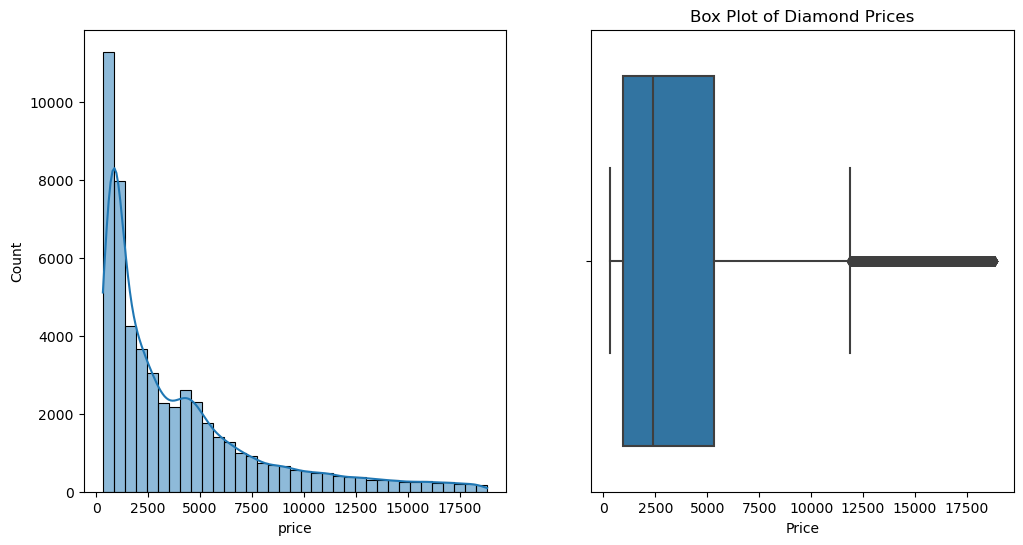

In [273]:
diamonds_average_price = diamonds.price.mean()
print(diamonds_average_price)
diamonds_median_price = diamonds.price.median()
print(diamonds_median_price)
#diamonds_iqr_price = diamonds.price.quantile(0.75) - diamonds.price.quantile(0.25)
#print(diamonds_iqr_price)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='price', data=diamonds, bins=35, kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(x='price', data=diamonds)
plt.title('Box Plot of Diamond Prices')
plt.xlabel('Price')
plt.show()
plt.close()

The median of 2401 represents our data more accurately than the mean as there are a lot of extreme outliers which skew our results.

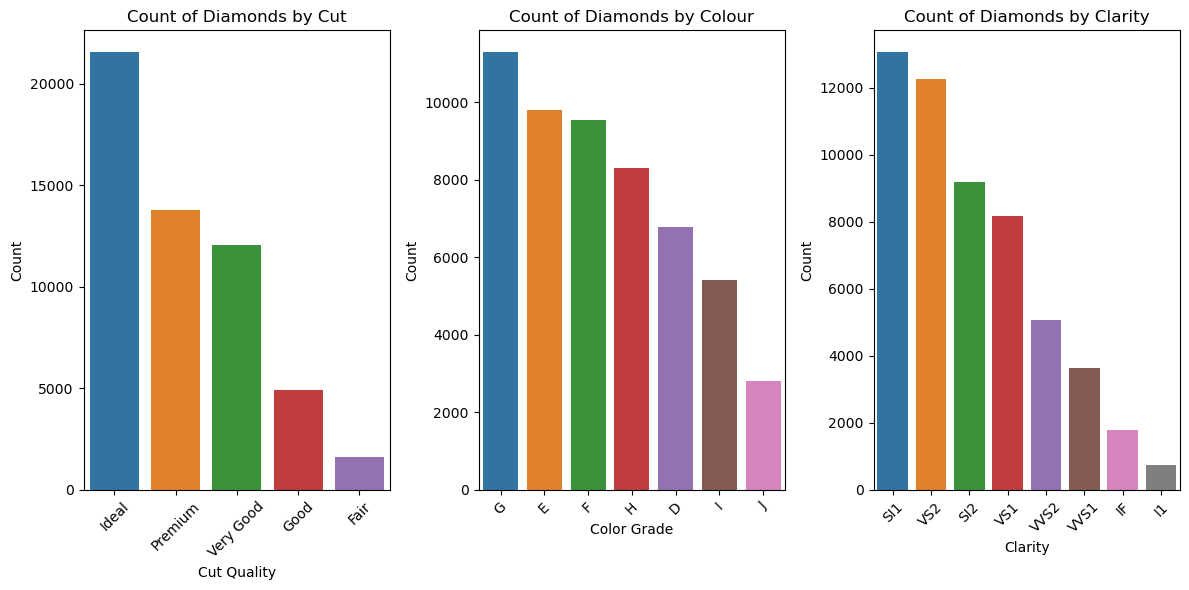

In [274]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
sns.countplot(x='cut', data=diamonds, order=diamonds['cut'].value_counts().index, ax=axes[0])
axes[0].set_title('Count of Diamonds by Cut')
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].set_xlabel('Cut Quality')
axes[0].set_ylabel('Count')
sns.countplot(x='color', data=diamonds, order=diamonds['color'].value_counts().index, ax=axes[1])
axes[1].set_title('Count of Diamonds by Colour')
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].set_xlabel('Color Grade')
axes[1].set_ylabel('Count')
sns.countplot(x='clarity', data=diamonds, order=diamonds['clarity'].value_counts().index, ax=axes[2])
axes[2].set_title('Count of Diamonds by Clarity')
axes[2].tick_params(axis='x', labelrotation=45)
axes[2].set_xlabel('Clarity')
axes[2].set_ylabel('Count')
plt.tight_layout()
plt.show()
plt.close()

Is there a correlatiom between carat weight and price? If so, how does diamond cut, colour and clarity compare?

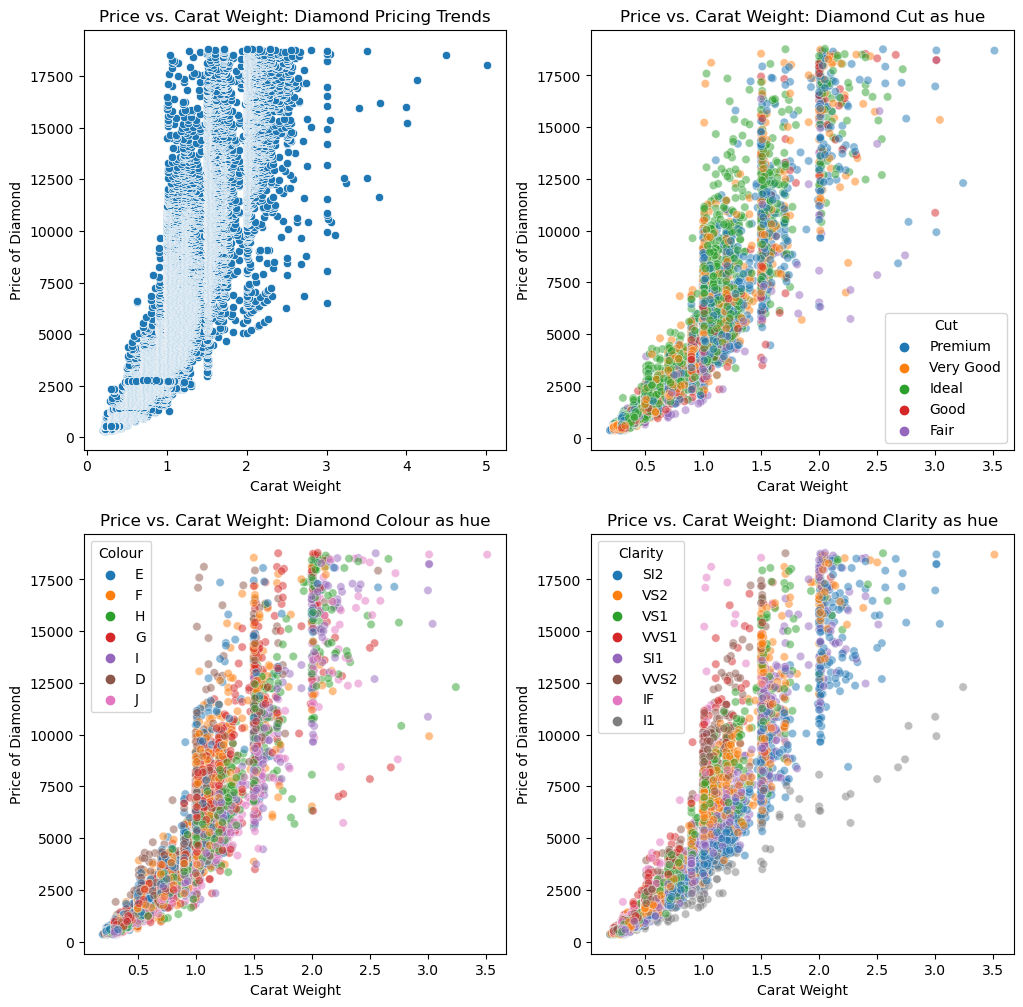

Correlation of diamond price and carat weight:
         price    carat
price  1.00000  0.92161
carat  0.92161  1.00000


In [275]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x='carat', y='price', data=diamonds)
plt.xlabel('Carat Weight')
plt.ylabel('Price of Diamond')
plt.title('Price vs. Carat Weight: Diamond Pricing Trends')

#plt.figure(figsize=(12, 6))
#sampling data for clearer view
sampled_data = diamonds.sample(n=7500, random_state=3)

plt.subplot(2, 2, 2)
sns.scatterplot(x='carat', y='price', hue='cut', data=sampled_data, alpha=0.5)
plt.title('Price vs. Carat Weight: Diamond Cut as hue')
plt.xlabel('Carat Weight')
plt.ylabel('Price of Diamond')
plt.legend(title='Cut')

plt.subplot(2, 2, 3)
sns.scatterplot(x='carat', y='price', hue='color', data=sampled_data, alpha=0.5)
plt.title('Price vs. Carat Weight: Diamond Colour as hue')
plt.xlabel('Carat Weight')
plt.ylabel('Price of Diamond')
plt.legend(title='Colour')

plt.subplot(2, 2, 4)
sns.scatterplot(x='carat', y='price', hue='clarity', data=sampled_data, alpha=0.5)
plt.title('Price vs. Carat Weight: Diamond Clarity as hue')
plt.xlabel('Carat Weight')
plt.ylabel('Price of Diamond')
plt.legend(title='Clarity')


plt.show()

price_v_carat_correlation = diamonds[['price', 'carat']].corr()
print("Correlation of diamond price and carat weight:")
print(price_v_carat_correlation)

How does the price vary with cut quaility, colour grade and clarity?

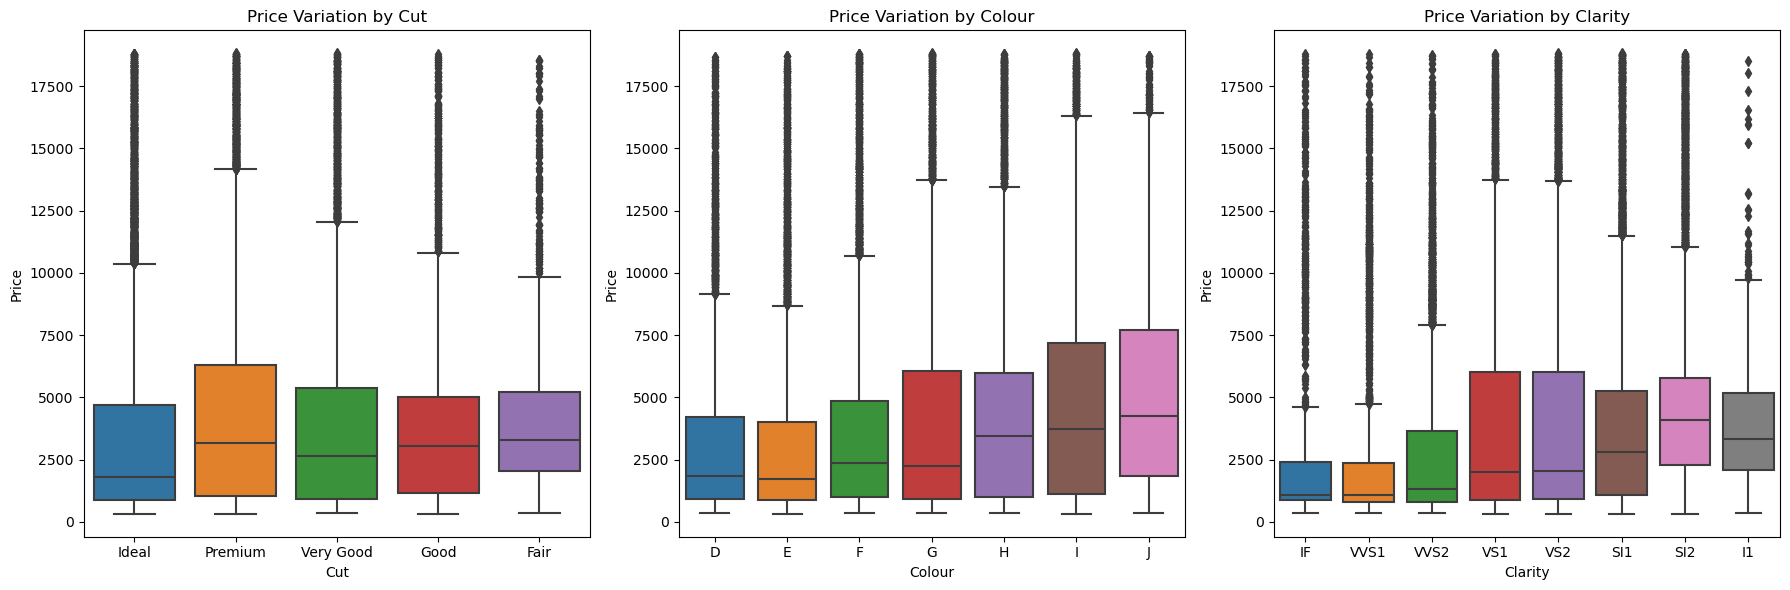

In [276]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='cut', y='price', data=diamonds, order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
plt.title('Price Variation by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.subplot(1, 3, 2)
sns.boxplot(x='color', y='price', data=diamonds, order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Price Variation by Colour')
plt.xlabel('Colour')
plt.ylabel('Price')
plt.subplot(1, 3, 3)
sns.boxplot(x='clarity', y='price', data=diamonds, order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
plt.title('Price Variation by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.tight_layout()
plt.show()
plt.close()

How are carat weights distributed?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


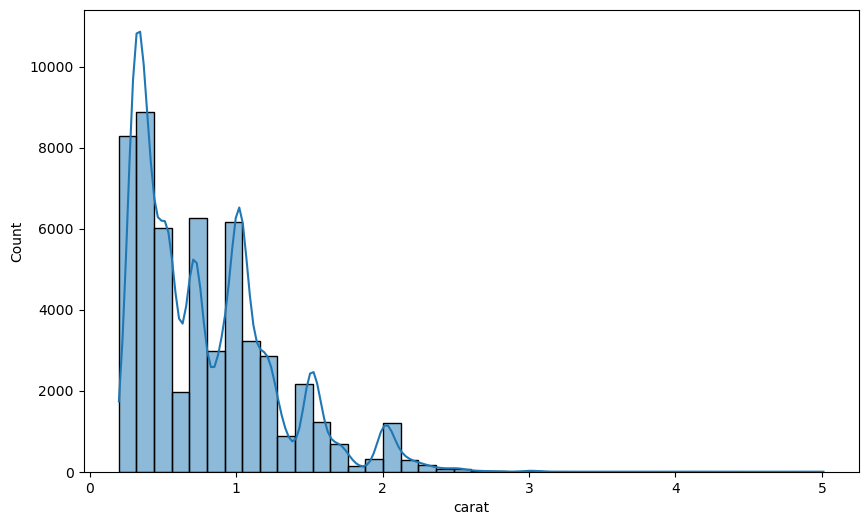

In [277]:
plt.figure(figsize=(10, 6))
sns.histplot(x='carat', data=diamonds, bins=40, kde=True)
plt.show()
plt.close()

How are the diamond dimensions distributed? 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


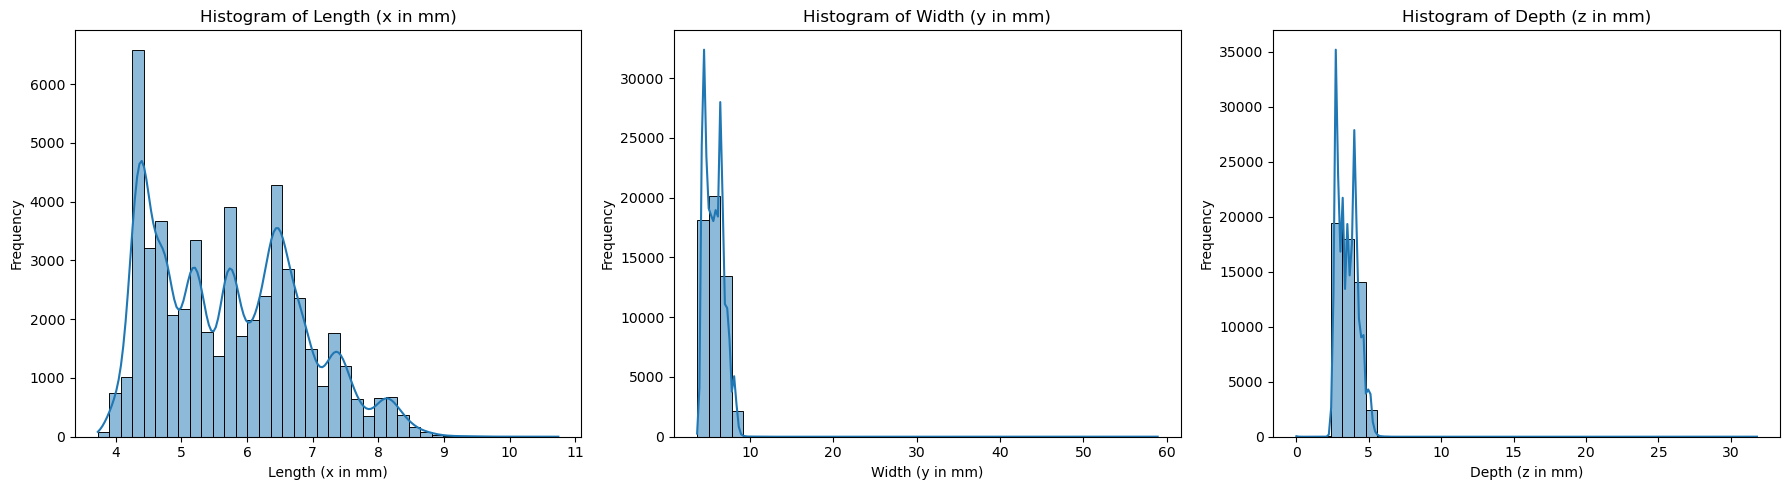

In [278]:
# creating histograms of diamond dimensions
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(diamonds['x'], bins=40, kde=True)
plt.title('Histogram of Length (x in mm)')
plt.xlabel('Length (x in mm)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(diamonds['y'], bins=40, kde=True)
plt.title('Histogram of Width (y in mm)')
plt.xlabel('Width (y in mm)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(diamonds['z'], bins=40, kde=True)
plt.title('Histogram of Depth (z in mm)')
plt.xlabel('Depth (z in mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()